<a href="https://colab.research.google.com/github/girlwcode/2021DataYouthCampus/blob/master/Week2/4_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신 실습

python의 scikit-learn 패키지를 이용해 서포트 벡터 머신을 직접 실행해보자.

### 데이터 불러오기 및 분할하기

로지스틱 회귀분석 때 사용했던 [cancer dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset)을 그대로 사용하자.

In [85]:
from sklearn import datasets
import numpy as np
data = datasets.load_breast_cancer()

x = data['data']
y = data['target']

print(x.shape, y.shape)

(569, 30) (569,)


In [86]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 - 6:2:2 비율
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(341, 30) (114, 30) (114, 30)


### 모델 학습 및 평가하기

Scikit-learn에서 제공하는 [svm](https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm) 모듈에는 다양한 서포트 벡터 관련 모델이 포함되어 있다. 이들 중 [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)(Support Vector Classifier)가 수업 시간에 배웠던 서포트 벡터 머신에 해당한다. 입력 변수를 살펴보면, kernel이나 C 값 등을 조절할 수 있다는 것을 알 수 있다.

In [87]:
from sklearn.svm import SVC

먼저 linear SVM을 학습하고 validation data에 대한 분류 accuracy를 계산해 보자.

In [88]:
# linear SVM 학습하기
linear_svm = SVC(kernel='linear')
linear_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
# linear SVM accuracy 계산하기
from sklearn.metrics import accuracy_score
pred_val = linear_svm.predict(x_val)
print(f"accuracy:{accuracy_score(y_val, pred_val)}")

accuracy:0.9649122807017544


다음으로, for문 등을 이용해 다양한 커널로 SVM 모델을 학습해 보자. (실습!)

In [52]:
# TODO: 여러 가지 kernel을 사용해 SVM 학습하고 accuracy 계산하기
kernels = ['poly','rbf','sigmoid']
for kernel in kernels :
  linear_svm = SVC(kernel = kernel)
  linear_svm.fit(x_train,y_train)
  pred_val = linear_svm.predict(x_test)
  print("kernel: ",kernel, f", accuracy:{accuracy_score(y_test, pred_val)}")

kernel:  poly , accuracy:0.8859649122807017
kernel:  rbf , accuracy:0.8947368421052632
kernel:  sigmoid , accuracy:0.4473684210526316


수업 시간에 RBF(가우시안) 커널을 사용할 때 C와 gamma의 변화에 따른 결정 경계의 변화를 설명한 바 있다. 이를 확인하기 위해, C와 gamma의 값을 아래의 네 가지 종류 중에서 골라 총 16가지의 조합에 대한 SVM을 학습하고 분류 accuracy를 계산해 보자. (실습!)

In [53]:
# TODO: 각 조합에 대해 SVM 학습하고 accuracy 계산하기
C = [1, 10, 100, 1000]
Gamma = [0.00001, 0.0001, 0.001, 0.01]        
model = {"C":[],"Gamma":[],"accuracy":[]}

for i in range (0,len(C)) :
  for j in range (0,len(Gamma)) : 
    linear_svm = SVC(C = C[i], kernel = 'rbf', gamma= Gamma[i])
    linear_svm.fit(x_train,y_train)
    pred_val = linear_svm.predict(x_val)
    accuracy = accuracy_score(y_val, pred_val)
    model["C"].append(C[i])
    model["Gamma"].append(Gamma[j])
    model["accuracy"].append(accuracy)
    print("C = ", C[i], ", Gamma = ", Gamma[j],", accuracy:",accuracy)

C =  1 , Gamma =  1e-05 , accuracy: 0.9473684210526315
C =  1 , Gamma =  0.0001 , accuracy: 0.9473684210526315
C =  1 , Gamma =  0.001 , accuracy: 0.9473684210526315
C =  1 , Gamma =  0.01 , accuracy: 0.9473684210526315
C =  10 , Gamma =  1e-05 , accuracy: 0.9385964912280702
C =  10 , Gamma =  0.0001 , accuracy: 0.9385964912280702
C =  10 , Gamma =  0.001 , accuracy: 0.9385964912280702
C =  10 , Gamma =  0.01 , accuracy: 0.9385964912280702
C =  100 , Gamma =  1e-05 , accuracy: 0.8947368421052632
C =  100 , Gamma =  0.0001 , accuracy: 0.8947368421052632
C =  100 , Gamma =  0.001 , accuracy: 0.8947368421052632
C =  100 , Gamma =  0.01 , accuracy: 0.8947368421052632
C =  1000 , Gamma =  1e-05 , accuracy: 0.6491228070175439
C =  1000 , Gamma =  0.0001 , accuracy: 0.6491228070175439
C =  1000 , Gamma =  0.001 , accuracy: 0.6491228070175439
C =  1000 , Gamma =  0.01 , accuracy: 0.6491228070175439


위의 경우 중 가장 우수한 모델을 이용해 test data에서의 정확도를 확인해 보자. (실습!)

In [54]:
# TODO: 가장 좋다고 판단되는 SVM 모델로 test data 에 대한 정확도 확인하기
#print(model)
best = model["accuracy"].index(max(model["accuracy"]))

linear_svm = SVC(C = C[best], kernel = 'rbf', gamma= Gamma[best])
linear_svm.fit(x_train,y_train)
pred_test = linear_svm.predict(x_test)
accuracy = accuracy_score(y_test, pred_val)

print("C = ", C[best], ", Gamma = ", Gamma[best],f", accuracy:{accuracy}")

C =  1 , Gamma =  1e-05 , accuracy:0.631578947368421


### Grid Search

위와 같이 다양한 하이퍼파라미터의 조합을 실험하여 최적의 조합을 찾는 것을 Grid Search 라 한다. 

![](https://miro.medium.com/max/700/1*Xq9OvMKXhrF3W2RBJCWW7w.png)

Scikit-learn에서는 Grid Search와 cross validation을 함께 수행하는 [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV) 모듈을 제공하고 있다. 이를 이용해서 위의 작업을 보다 간단히 수행해 보자.

In [90]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV에서 cross validation을 하므로, validation data가 필요없음
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# 아래와 같이 탐색할 조합들을 지정
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [0.00001, 0.0001, 0.001, 0.01]}

In [91]:
# GridSearchCV를 이용하여 분류하기
svm_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=4, scoring='accuracy')
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [92]:
# 최적의 조합과 그 때의 점수 알아보기
print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 1000, 'gamma': 1e-05}
0.9450589970501474


### 추가 예제: Face Recognition

SVM의 우수한 성능에 대해 수업 시간에 언급한 바 있다. 이를 체감할 수 있는 좋은 예시 중 하나가 대표적인 패턴 인식 문제인 Face Recognition이다. Face Recognition에서 SVM이 어떻게 적용되며 어떤 성능을 낼 수 있는지 알아보자. 

In [93]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


아래의 코드를 통해 데이터의 일부를 확인해 볼 수 있다.

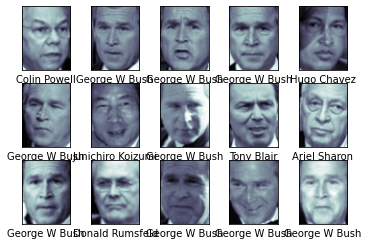

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

일반적인 SVM은 범주가 두 종류여야 잘 작동하는데, 주어진 데이터는 분류해야 할 범주가 여러 개이다. 그러나 SVC 객체는 이러한 경우에 대해서도 잘 작동할 수 있도록 구성되어 있다. [설명](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)을 잘 읽어보면서 수업 시간에 배웠던, 두 가지 이상의 범주를 분류하는 방법이 어디에 나와 있는지 한 번 찾아보자.

종속 변수의 분포를 살펴보면, 아래와 같이 특정 데이터가 두드러지게 많다는 것을 확인할 수 있다. 수업 때 언급했듯이 이러한 data imbalance 문제는 머신 러닝에서 주의 깊게 다뤄야 할 부분이다. 

[1 3 3 ... 7 3 5]  =>  Counter({3: 530, 1: 236, 7: 144, 2: 121, 4: 109, 0: 77, 5: 71, 6: 60})


<BarContainer object of 8 artists>

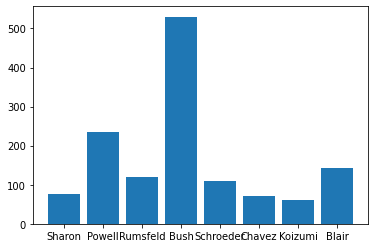

In [95]:
import collections

count_faces = collections.Counter(faces.target)
print(faces.target, ' => ', count_faces)

names = [x.split(' ')[-1] for x in faces.target_names]
counts = [count_faces[i] for i in range(len(faces.target_names))]
plt.bar(names, counts)

앞서 배운 GridSearchCV를 사용하기 위해, training / test data 로 나누자.

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=1)
print(x_train.shape, x_test.shape)

(1078, 2914) (270, 2914)


가우시안 커널을 사용하면 이러한 데이터도 효과적으로 분류할 수 있다. 앞서 언급한 data imbalance 문제를 해결하기 위해, class_weight 파라미터를 이용하자. (실습!)

In [97]:
# TODO: class_weight 파라미터를 활용하여 SVM 학습하기
svm = SVC(kernel = 'rbf',class_weight='balanced')
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

accuracy:  0.7888888888888889


Text(91.68, 0.5, 'predicted label')

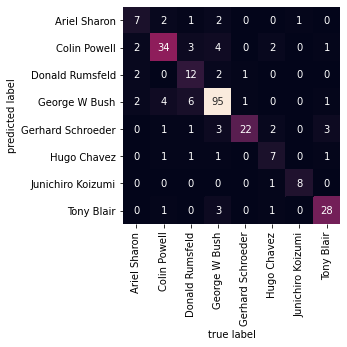

In [98]:
# 학습한 모델로 정확도 및 confusion matrix 구하기
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

pred_test = svm.predict(x_test)
print("accuracy: ", accuracy_score(y_test, pred_test))

mat = confusion_matrix(y_test, pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

주어진 데이터(사진)의 크기는 62*47=2914 픽셀로, 그 동안 다루었던 데이터에 비해 상당히 큰 차원이다. 이를 적정 수준으로 줄여 주기 위해, [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)를 시행한다. 이를 통해 2914차원의 데이터를 150차원으로 줄일 수 있다.

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, whiten=True, random_state=1)

링크를 참조하여 PCA를 training 데이터로 학습하고, 이를 다시 training 데이터에 적용하여 얻은 150차원 데이터를 x_pca_train 이라 하자. (실습!)

In [100]:
# TODO: PCA 학습 및 적용하기

x_pca_train =  pca.fit_transform(x_train)
print(x_pca_train)

[[ 0.46970817 -0.15695825  0.23920694 ...  0.59431404  0.41424918
   0.39479753]
 [ 0.88133854 -0.7391166   0.41608873 ...  0.17529704  0.01352517
  -0.2549738 ]
 [ 0.46055916  2.246191    0.46404767 ...  0.11914971 -0.27308998
  -0.01322127]
 ...
 [ 0.04612359  0.15517782  1.070083   ... -1.0893563  -0.26158148
   0.32580137]
 [ 1.1792012   1.4305351   1.6678727  ...  0.02385976 -0.9534993
  -2.9462423 ]
 [-0.21816315  0.29886097  0.6271945  ...  0.16143768  1.6354802
  -0.53436536]]


150차원으로 줄어든 데이터에 대해 SVM 모델을 학습한다.

In [71]:
svm_pca = SVC(kernel='rbf', class_weight='balanced')
svm_pca.fit(x_pca_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Test data에 대한 예측 결과를 pred_pca_test 라고 하고 accuracy와 confusion matrix를 통해 분류가 잘 되었는지 확인해 보자. (실습!)

Accuracy :  0.24074074074074073


Text(91.68, 0.5, 'predicted label')

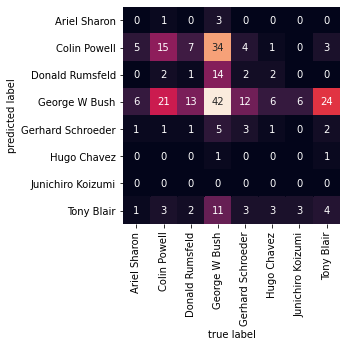

In [75]:
# TODO: test data에 대한 예측 수행하기
x_pca_test =  pca.fit_transform(x_test)
pred_pca_test = svm_pca.predict(x_pca_test)
print("Accuracy : ",accuracy_score(y_test,pred_pca_test))

mat = confusion_matrix(y_test, pred_pca_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

accuracy:  0.24074074074074073


Text(91.68, 0.5, 'predicted label')

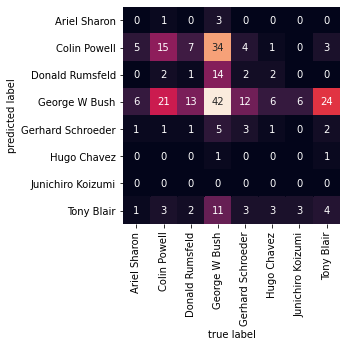

In [76]:
print("accuracy: ", accuracy_score(y_test, pred_pca_test))
mat = confusion_matrix(y_test, pred_pca_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

아래의 코드를 수행하면, test data에 대한 예측이 맞았는지를 직접 살펴볼 수 있다.

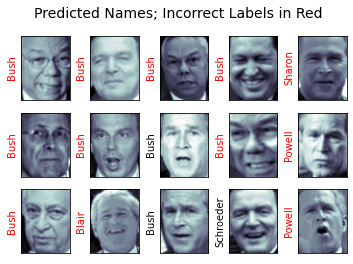

In [77]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred_pca_test[i]].split()[-1],
                   color='black' if pred_pca_test[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

앞서 배운 GridSearchCV를 이용하여 최적의 조합을 찾아보자. (실습!)

In [106]:
# TODO: param_grid 및 GridSearchCV 객체 생성 후 학습하고 최적의 조합 찾기

# 아래와 같이 탐색할 조합들을 지정
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [0.00001, 0.0001, 0.001, 0.01]}

# GridSearchCV를 이용하여 분류하기
svm_pca_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=4, scoring='accuracy')
svm_pca_grid.fit(x_pca_train, y_train)
print("best score:",svm_grid.best_score_)
print("best params:",svm_grid.best_params_)

best score: 0.9450589970501474
best params: {'C': 1000, 'gamma': 1e-05}


이를 test data에 대해 적용한 결과를 확인해 보자. (실습!)

accuracy:  0.1925925925925926


Text(91.68, 0.5, 'predicted label')

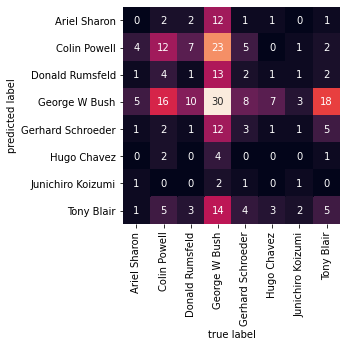

In [107]:
# TODO: GridSearchCV로 찾은 조합의 모델로 accuracy와 confusion matrix 그리기
#'C': 1000, 'gamma': 1e-05}
svm_pca = SVC(kernel='rbf', class_weight='balanced',C=svm_grid.best_params_["C"],gamma=svm_grid.best_params_["gamma"] )
svm_pca.fit(x_pca_train, y_train)
pred_pca_grid_test = svm_pca.predict(x_pca_test)

print("accuracy: ", accuracy_score(y_test, pred_pca_grid_test))
mat = confusion_matrix(y_test, pred_pca_grid_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')